# <center>Cleaning Data in Python</center>

[Data Camp Link](https://www.datacamp.com/courses/cleaning-data-in-python)

[Chapter 1: Exploring your data](#Chapter-1:-Exploring-your-data) <br>
[Chapter 2: Tidying data for analysis](#Chapter-2:-Tidying-data-for-analysis) <br>
[Chapter 3: Combining data for analysis](#Chapter-3:-Combining-data-for-analysis) <br>
[Chapter 4: Cleaning data for analysis](#Chapter-4:-Cleaning-data-for-analysis) <br>
[Chapter 5: Case study](#Chapter-5:-Case-study) 

# Chapter 1: Exploring your data

In [1]:
# all imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and viewing your data

In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the [NYC Open Data](http://opendata.cityofnewyork.us/) portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the `.head()` and `.tail()` methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The `.shape` and `.columns` attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, `df_subset`, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

#### Instructions

- Import `pandas` as `pd`.
- Read `'dob_job_application_filings_subset.csv'` into a DataFrame called `df`.
- Print the head and tail of `df`.
- Print the shape of `df` and its columns. Note: `.shape` and `.columns` are *attributes, not methods*, so you don't need to follow these with parentheses `()`.
- Hit 'Submit Answer' to view the results! Notice the suspicious number of `0` values. Perhaps these represent missing data.

In [2]:
# Import pandas
# import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('data/dob_job_application_filings_subset.csv')

df_subset = df.loc[:, ['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', \
                    'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage',\
                    'Street Frontage', 'ExistingNo. of Stories',\
                    'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

C:\Users\mmust\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


---------------

In [3]:
# lets see how our df_subset looks like
df_subset.head(3)

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54


----------

### Further diagnosis

In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful `.info()` method.

The `.info()` method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the `'Initial Cost'` and `'Total Est. Fee'` columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

The full DataFrame `df` and the subset DataFrame `df_subset` have been pre-loaded. Your task is to use the `.info()` method on these and analyze the results.

#### Instructions

- Print the `info` of `df`.
- Print the `info` of the subset dataframe, `df_subset`.

In [4]:
# Print the info of df
# print(df.info())

# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None


**NOTE**: As we can see, `Initial Cost` and `Total Est. Fee` columns are **`object`** type meaning they are string. In the future, when we want to do computational analysis with these columns, we need to convert them from `str` to `int` or `float`.

----------

### Frequency counts for categorical data

As you've seen, `.describe()` can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the `.value_counts()` method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called `dropna` which is `True` by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the `dropna` column to `False` so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the `'Borough'`, `'State'`, and `'Site Fill'` columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the `'State'` column from `NY`, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

#### Instructions

- Print the value counts for:
    - The `'Borough'` column.
    - The `'State'` column.
    - The `'Site Fill'` column.

In [5]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))
print()

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))
print()

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
KS        6
MA        6
GA        6
VA        5
CO        4
MN        3
WI        3
AZ        3
SC        3
RI        2
UT        2
NC        2
MI        1
IN        1
VT        1
NM        1
WA        1
Name: State, dtype: int64

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


-----------

### Visualizing single variables with histograms

Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is `'Existing Zoning Sqft'`.

The `.plot()` method allows you to create a plot of each column of a DataFrame. The `kind` parameter allows you to specify the type of plot to use - `kind='hist'`, for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the `'Existing Zoning Sqft'` column using the `.describe()` method. You'll notice that there are extremely large differences between the `min` and `max` values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments `logx=True` or `logy=True` can be passed in to `.plot()` depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

#### Instructions

- Import `matplotlib.pyplot` as `plt`.
- Create a histogram of the `'Existing Zoning Sqft'` column. Rotate the axis labels by 70 degrees and use a log scale for both axes.
- Display the histogram using `plt.show()`.

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


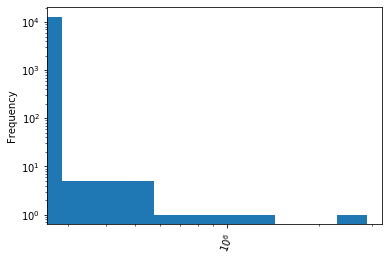

In [6]:
# Import matplotlib.pyplot
# import matplotlib.pyplot as plt

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

<div class="alert alert-block alert-success">
<b>NOTE:</b> 

If you do not use **log** for columns with large variances, the frequency counts might not be visible for lower frequencies as seen below. We will do the same plotting without taking log of both axes.
</div>

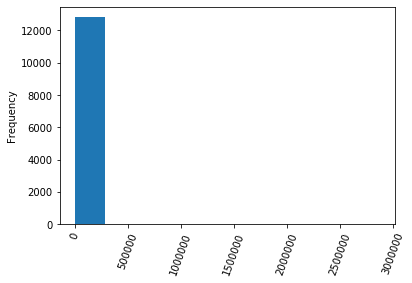

In [7]:
# Plot the histogram without log
df['Existing Zoning Sqft'].plot(kind='hist', rot=70)

# Display the histogram
plt.show()

-------

### Visualizing multiple variables with boxplots

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a boxplot to compare the `'initial_cost'` across the different values of the `'Borough'` column. The pandas `.boxplot()` method is a quick way to do this, in which you have to specify the `column` and `by` parameters. Here, you want to visualize how `'initial_cost'` varies by `'Borough'`.

`pandas` and `matplotlib.pyplot` have been imported for you as `pd` and `plt`, respectively, and the DataFrame has been pre-loaded as `df`.

#### Instructions

- Using the `.boxplot()` method of `df`, create a boxplot of `'initial_cost'` across the different values of `'Borough'`.
- Display the plot.

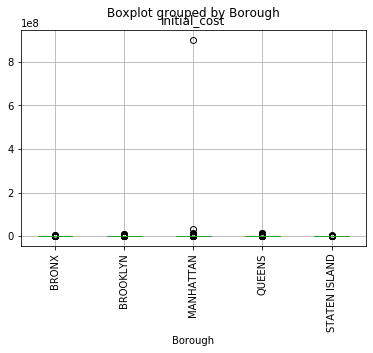

In [8]:
# Import necessary modules
# import pandas as pd
# import matplotlib.pyplot as plt

# create initial_cost in the example, clear the $ sign in front of float
# change the type of object to float to compute plotting
df['initial_cost'] = df['Initial Cost'].str.lstrip('$').astype('float')

# alternative
# df['initial_cost'] = df['Initial Cost'].str.replace('$', "").astype('float') 

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# # Display the plot
plt.show()

As we can see, there are only two outliers in Manhattan only. They might be valid data points as Manhattan is very expensive to live.

----------

### Visualizing multiple variables with scatter plots

Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

In this exercise, your job is to make a scatter plot with `'initial_cost'` on the x-axis and the `'total_est_fee'` on the y-axis. You can do this by using the DataFrame `.plot()` method with `kind='scatter'`. You'll notice right away that there are 2 major outliers shown in the plots.

Since these outliers dominate the plot, an additional DataFrame, `df_subset`, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.

When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.

#### Instructions

- Using `df`, create a scatter plot (`kind='scatter'`) with `'initial_cost'` on the x-axis and the `'total_est_fee'` on the y-axis. Rotate the x-axis labels by 70 degrees.
- Create another scatter plot exactly as above, substituting `df_subset` in place of `df`.

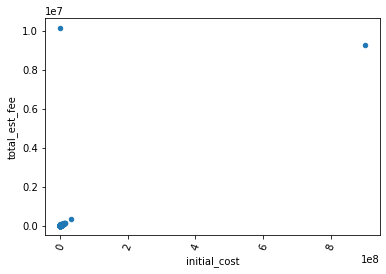

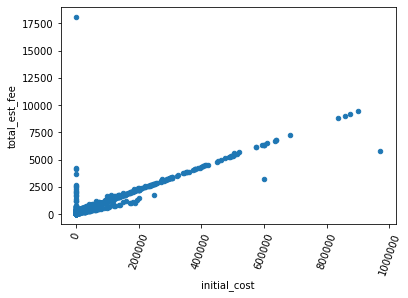

In [9]:
# Import necessary modules
# import pandas as pd
# import matplotlib.pyplot as plt

# create total_est_fee column
df['total_est_fee'] = df['Total Est. Fee'].str.lstrip('$').astype('float')
df['initial_cost'] = df['Initial Cost'].str.lstrip('$').astype('float')

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# credentials for subsetting are not clear
# i will use index instead

indexes = [9107, 10789, 8584, 11301, 7480, 8416, 5927, 6869, 2927, 7064, 9226, 10637, 10911, 7733, 4767, 1680, 993, 10468, 2373, 6270, 2883, 4294, 9435, 7351, 4578, 10284, 5450, 382, 5969, 1707, 12360, 10443, 1056, 6473, 2543, 2362, 6436, 6209, 2476, 9041, 4444, 6443, 8654, 4043, 388, 11113, 2591, 6227, 1687, 11561, 7233, 8263, 12274, 9896, 2257, 12745, 1825, 5047, 1980, 9876, 5438, 10679, 1433, 8797, 9492, 9124, 8550, 11294, 9233, 8491, 1219, 10105, 7984, 9133, 5455, 2542, 10027, 4282, 1458, 7185, 2000, 7567, 895, 4280, 822, 5399, 3916, 2764, 12803, 4928, 9581, 3277, 5189, 2673, 12288, 1657, 8916, 11065, 6066, 9143, 12707, 1781, 3598, 6714, 8145, 11609, 3749, 2832, 3210, 10596, 8587, 4494, 2466, 2191, 9172, 3167, 2823, 1352, 4430, 5372, 7084, 7635, 10493, 3998, 4975, 11076, 758, 11681, 1726, 2834, 7693, 2471, 1438, 8154, 3559, 3677, 3125, 3449, 12547, 3922, 3497, 8995, 3094, 4434, 175, 10779, 11189, 12449, 4598, 4428, 9104, 7636, 1376, 8186, 3016, 12034, 7877, 1132, 11646, 250, 455, 6328, 3863, 1239, 8030, 1305, 663, 5106, 4509, 293, 8872, 221, 1177, 12281, 2009, 3993, 10693, 5816, 10181, 1867, 6074, 10607, 12723, 10920, 3027, 1139, 3827, 5944, 5945, 8294, 1770, 9529, 1804, 12359, 3146, 1016, 3081, 4284, 5255, 2201, 5660, 4435, 7198, 2777, 2619, 1968, 7243, 850, 5515, 5725, 9174, 1511, 9370, 10837, 3263, 10197, 10025, 51, 9189, 5623, 3359, 3696, 5643, 10618, 8363, 9190, 1095, 9799, 8864, 6629, 3896, 3126, 4413, 9000, 4479, 2102, 11567, 3541, 8977, 3547, 4508, 10862, 5934, 1161, 3575, 4016, 11160, 5740, 4418, 8400, 8645, 9511, 8896, 12148, 2680, 9834, 10582, 10095, 3494, 10084, 8786, 9630, 6108, 7391, 1020, 11829, 7705, 5460, 2725, 5125, 3302, 10354, 3603, 399, 5504, 2532, 8984, 6081, 8808, 8803, 544, 5872, 151, 5458, 11232, 8166, 10229, 6966, 9487, 5826, 3199, 203, 7285, 4506, 254, 10853, 8324, 5857, 1618, 5224, 2572, 2854, 12516, 7028, 8493, 11684, 2554, 12324, 7715, 2636, 949, 2315, 5570, 4162, 4259, 11243, 5463, 2447, 6248, 9885, 360, 939, 12403, 5197, 8694, 774, 3910, 10782, 296, 5178, 7530, 11711, 8017, 12472, 2422, 9229, 7659, 3132, 1768, 523, 7086, 3063, 1375, 8871, 7578, 2939, 2995, 11114, 5849, 4117, 11255, 1351, 1628, 6226, 1527, 1452, 7767, 6540, 10131, 4173, 1173, 2374, 9534, 5527, 6513, 9121, 5706, 12630, 1541, 136, 7417, 5705, 10831, 48, 11950, 84, 11115, 9472, 11620, 7917, 6626, 7291, 7935, 8501, 1559, 731, 363, 6097, 9, 4869, 8736, 9789, 2642, 2396, 8705, 12073, 314, 7365, 8087, 7608, 7389, 10976, 6975, 4348, 1394, 7861, 1751, 1545, 3714, 6071, 3291, 5213, 8893, 6398, 10513, 5328, 7275, 6447, 3982, 5724, 2192, 2530, 9931, 4458, 7227, 114, 1835, 7736, 2865, 2413, 9494, 3562, 5339, 3543, 9925, 3187, 3313, 1124, 4098, 8583, 10796, 5983, 2318, 594, 9198, 12361, 4655, 9562, 6264, 433, 8344, 9739, 11137, 4949, 1999, 4626, 8008, 12298, 2742, 4170, 2449, 9365, 10795, 5670, 7774, 9675, 2674, 735, 12740, 7400, 6863, 5793, 5652, 12673, 11820, 4983, 100, 11569, 6819, 3275, 8795, 12606, 2446, 5797, 3137, 5143, 12072, 307, 8117, 5441, 5114, 5824, 12511, 10325, 103, 10026, 12244, 5633, 9441, 12004, 7585, 3624, 8065, 439, 2518, 1070, 657, 2170, 9520, 3057, 1510, 7343, 2739, 9474, 9870, 104, 10391, 8899, 2084, 3943, 10508, 1607, 3798, 9825, 12614, 8926, 11936, 7977, 10089, 34, 3941, 5774, 3928, 4595, 5050, 2114, 4201, 2942, 4275, 11807, 9980, 3722, 12518, 1702, 11564, 9158, 9551, 3536, 12346, 1300, 5074, 11839, 3195, 9891, 6980, 6557, 1427, 7225,7399,8698,7612,760,12802,8540,5897,11739,7200,11774,11658,634,10403,8107,6154,3470,9379,11853,12351,4696,3623,11019,3174,9306,4839,8509,10910,224,3782,10287,12271,5512,1235,462,7513,10473,4123,336,5947,11037,3185,10348,755,3083,6455,1659,9453,6753,1007,6139,7144,11383,7021,3727,10047,7018,11393,71,1653,460,2066,4999,5228,9893,2099,4307,12035,2029,9786,3343,11586,1478,12133,2174,8956,4476,7912,3670,2515,7856,12719,6630,11910,5952,6392,10967,5194,1195,5382,9200,102,11313,4511,7950,7422,7451,6077,752,8919,11461,11136,11173,8827,11593,9146,10617,1497,10562,3534,539,8077,6522,6560,6734,2100,11713,4602,1699,20,6423,7354,12413,11317,5379,4329,10888,12442,7942,4066,6192,324,4643,4970,5588,8262,6800,5877,3725,4749,2204,8226,7302,4103,1383,8137,266,4153,980,5601,2079,3853,2155,4437,3448,478,4561,1199,783,8718,11479,11469,8380,5902,2081,9545,4118,861,1186,7866,8103,4486,7038,8044,2976,9986,9574,2679,6411,4977,12021,4819,8195,1662,4817,3046,2693,10897,10858,3994,12530,5077,5380,5133,9357,4678,9957,1037,1735,1611,7501,983,2479,3937,6610,96,8661,8731,10008,7621,3425,6810,8672,60,3700,3519,2648,10065,3439,7584,12553,2380,5755,8174,11259,10983,5148,4051,3198,5253,7479,2514,1102,8475,2265,9431,839,2814,3501,4806,11421,11943,12248,4061,8835,6168,2755,6890,12575,10038,5540,4200,376,11357,1024,8619,3787,8185,3104,1398,5440,8569,2577,623,9020,12084,4801,8041,2727,5581,11924,4603,10063,4349,11327,12309,6061,2947,4337,621,10448,2587,1739,3593,7444,11629,12352,6218,7558,5627,4191,5919,3887,5861,5713,10550,3785,12776,8253,2236,11822,9045,12224,9261,11143,2047,5134,11804,1230,120,11175,9995,11688,907,7948,4422,1484,4013,6042,10776,5569,11231,11965,5999,7851,7882,12090,957,6829,2407,8606,12844,7931,8577,2262,7746,6842,11864,2881,6767,11009,3971,12610,9766,1060,3596,1940,4905,10881,11208,1347,6722,9378,8937,5161,11602,1830,2064,8840,11010,3759,428,560,5430,12061,11157,492,9329,8525,10800,3939,11418,4091,4695,8287,12400,473,11959,3061,8617,2919,11657,10798,8442,11788,3522,11239,2675,1371,4247,2748,3414,69,8862,10386,9660,11514,7383,179,5292,10496,8130,9482,11776,8177,9748,3223,9724,11802,5703,11692,4863,9414,248,1637,5407,5674,8209,8398,9544,8349,12695,12804,1785,4392,2509,10735,684,8679,10593,8169,5617,8553,7989,8021,3980,4827,4371,10342,5582,5716,466,2248,3382,1380,6287,8108,4530,5378,5017,1259,15,7914,1284,3854,823,2861,11838,6279,12019,10315,2582,1760,7577,6786,4032,7678,5206,10615,6386,2596,6076,6167,11587,115,10385,7358,4147,5669,5798,7588,10022,6880,217,4647,4342,7607,11023,3393,4345,3368,1979,7118,3056,12307,7133,6179,747,9523,11223,9938,1721,3144,10445,2669,8611,11132,2131,32,7149,9784,10573,7772,6080,4501,10036,12555,8681,488,1439,1602,7595,11261,2288,10035,2230,9017,2133,2065,3569,4961,11084,11610,302,4613,10380,8993,4940,3748,679,9803,4988,1525,10681,10828,7857,306,4488,7409,7760,9338,5051,10060,6952,7229,6703,11798,7288,4634,5500,6291,10044,1258,12372,2280,8816,6374,1085,11834,12478,10178,7617,12828,5306,12683,9914,7170,9978,9597,6032,8963,10280,8319,10868,9731,12333,11029,10963,8575,11183,12031,4218,8082,12270,6491,424,12076,12498,3197,1064,867,8422,5926,6262,1692,10821,12795,9203,6333,10692,5335,5651,1158,6200,3758,11614,2370,9723,108,6908,1886,3445,3650,11764,2668,6054,3772,10068,11504,7871,220,9984,12075,12200,2546,10269,5265,515,711,171,7878,1778,581,40,8958,12390,5949,944,3653,10405,6193,8644,349,3102,5964,10887,7898,4181,7694,11915,2432,11474,4926,7055,5461,10747,2165,10074,984,9164,9583,5568,8517,1223,11273,9469,8890,12079,8537,5216,1758,7470,6762,11573,2302,2751,9346,8101,7620,6733,4558,5850,7205,6578,7156,3235,11762,10619,3147,5437,3764,1397,1990,8898,10818,]
df_subset2 = df.loc[indexes]

# plot
df_subset2.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

----------

# Chapter 2: Tidying data for analysis

### Reshaping your data using melt

Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables `Ozone`, `Solar.R`, `Wind`, and `Temp` each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently (e.g., this could make it easier to plot values).

In this exercise, you will practice melting a DataFrame using `pd.melt()`. There are two parameters you should be aware of: `id_vars` and `value_vars`. The `id_vars` represent the columns of the data you **do not** want to melt (i.e., keep it in its current shape), while the `value_vars` represent the columns you **do** wish to melt into rows. By default, if no `value_vars` are provided, all columns not set in the `id_vars` will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

The (tidy) DataFrame `airquality` has been pre-loaded. Your job is to melt its `Ozone`, `Solar.R`, `Wind`, and `Temp` columns into rows. Later in this chapter, you'll learn how to bring this melted DataFrame back into a tidy form.

#### Instructions

- Print the head of `airquality`.
- Use `pd.melt()` to melt the `Ozone`, `Solar.R`, `Wind`, and `Temp` columns of `airquality` into rows. Do this by using `id_vars` to specify the columns you **do not wish to melt**: `'Month'` and `'Day'`.
- Print the head of `airquality_melt`.

In [10]:
# import airquality data
airquality = pd.read_csv('data/airquality.csv')

# Print the head of airquality
print(airquality.head())

print()

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5

   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


--------

### Customizing melted data

When melting DataFrames, it would be better to have column names more meaningful than `variable` and `value` (the default names used by `pd.melt()`).

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the `variable` column by specifying an argument to the `var_name` parameter, and the `value` column by specifying an argument to the `value_name` parameter. You will now practice doing exactly this. Pandas as `pd` and the DataFrame `airquality` has been pre-loaded for you.

#### Instructions

- Print the head of `airquality`.
- Melt the columns of `airquality` with the default `variable` column renamed to `'measurement'` and the default `value` column renamed to `'reading'`. You can do this by specifying, respectively, the `var_name` and `value_name` parameters.
- Print the head of `airquality_melt`.

In [11]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

print()

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


----------

### Pivot data

Pivoting data is the opposite of melting it. Remember the tidy form that the `airquality` DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the `.pivot_table()` method!

While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.

`.pivot_table()` has an `index` parameter which you can use to specify the columns that you don't *want* pivoted: It is similar to the `id_vars` parameter of `pd.melt()`. Two other parameters that you have to specify are `columns` (the name of the column you want to pivot), and `values` (the values to be used when the column is pivoted). The melted DataFrame `airquality_melt` has been pre-loaded for you.

#### Instructions

- Print the head of `airquality_melt`.
- Pivot `airquality_melt` by using `.pivot_table()` with the rows indexed by `'Month'` and `'Day'`, the columns indexed by `'measurement'`, and the values populated with `'reading'`.
- Print the head of `airquality_pivot`.

In [12]:
# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

print()

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


As you can see, it does not look like the same as before. `Month` is indexed at a lower level creating a **`MultiIndex`** in the rows. We need to reset index using `reset_index()` method which we will be doing in the following exercise.

-------

### Resetting the index of a DataFrame

After pivoting `airquality_melt` in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a [hierarchical index (also known as a MultiIndex)](http://pandas.pydata.org/pandas-docs/stable/advanced.html).

Hierarchical indexes are covered in depth in [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas). In essence, they allow you to group columns or rows by another variable - in this case, by `'Month'` as well as `'Day'`.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: `.reset_index()`. Dan didn't show you how to use this method in the video, but you're now going to practice using it in this exercise to get back the original DataFrame from `airquality_pivot`, which has been pre-loaded.

#### Instructions

- Print the index of `airquality_pivot` by accessing its `.index` attribute. This has been done for you.
- Reset the index of `airquality_pivot` using its `.reset_index()` method.
- Print the new index of `airquality_pivot_reset`.
- Print the head of `airquality_pivot_reset`.

In [13]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

print()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

print()

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())

MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)

RangeIndex(start=0, stop=153, step=1)

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3


------------

### Pivoting duplicate values

So far, you've used the `.pivot_table()` method when there are multiple `index` values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the `aggfunc` parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as `airquality_dup`. In addition, the `airquality_melt` DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their `.shape` attributes to confirm the duplicate rows present in `airquality_dup`.

You'll see that by using `.pivot_table()` and the `aggfunc` parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using `.reset_index()`.

NumPy and pandas have been imported as `np` and `pd` respectively.

#### Instructions

- Pivot `airquality_dup` by using `.pivot_table()` with the rows indexed by `'Month'` and `'Day'`, the columns indexed by `'measurement'`, and the values populated with `'reading'`. Use `np.mean` for the aggregation function.
- Print the head of `airquality_pivot`.
- Flatten `airquality_pivot` by resetting its index.
- Print the head of `airquality_pivot` and then the original `airquality` DataFrame to compare their structure.

In [14]:
# create duplicated dataframe
airquality_dup = pd.concat([airquality_melt]*2, ignore_index = True)

# Pivot table the airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot.head())

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3
measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


---------

### Splitting a column with .str

The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as `tb`.

In this exercise, you're going to tidy the `'m014'` column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for `gender`, and the rest into a column for `age_group`. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the `str` attribute of columns of type `object`.

Begin by printing the columns of `tb` in the IPython Shell using its `.columns` attribute, and take note of the problematic column.

#### Instructions

- Melt `tb` keeping `'country'` and `'year'` fixed.
- Create a `'gender'` column by slicing the first letter of the `variable` column of `tb_melt`.
- Create an `'age_group'` column by slicing the rest of the `variable` column of `tb_melt`.
- Print the head of `tb_melt`. This has been done for you, so hit 'Submit Answer' to see the results!

In [15]:
# import tuberculosis
tb = pd.read_csv('data/tb.csv')

# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


**NOW**, as you can see, we have a seperate column/variable for `gender` and `age_group` which will make analysis easier.

-------

### Splitting a column with .split() and .get()

Another common way **multiple variables are stored in columns** is with a delimiter. You'll learn how to deal with such cases in this exercise, using a [dataset consisting of Ebola cases and death counts by state and country](https://data.humdata.org/dataset/ebola-cases-2014). It has been pre-loaded into a DataFrame as `ebola`.

Print the columns of `ebola` in the IPython Shell using `ebola.columns`. Notice that the data has column names such as `Cases_Guinea` and `Deaths_Guinea`. Here, the underscore `_ `serves as a delimiter between the first part (cases or deaths), and the second part (country).

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called `.split()`. By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on `'Cases_Guinea'`, for example, using `'Cases_Guinea'.split('_')`, which returns the list `['Cases', 'Guinea']`.

The next challenge is to extract the first element of this list and assign it to a `type` variable, and the second element of the list to a `country` variable. You can accomplish this by accessing the `str` attribute of the column and using the `.get()` method to retrieve the `0` or `1` index, depending on the part you want.

#### Instructions

- Melt `ebola` using `'Date'` and `'Day'` as the `id_vars`, `'type_country'` as the `var_name`, and `'counts'` as the `value_name`.
- Create a column called `'str_split'` by splitting the `'type_country'` column of `ebola_melt` on `'_'`. Note that you will first have to access the `str` attribute of `type_country` before you can use `.split()`.
- Create a column called `'type'` by using the `.get()` method to retrieve index `0` of the `'str_split'` column of `ebola_melt`.
- Create a column called `'country'` by using the `.get()` method to retrieve index `1` of the `'str_split'` column of `ebola_melt`.
- Print the head of `ebola_melt`. This has been done for you, so hit 'Submit Answer' to view the results!

In [16]:
# import ebola dataset
ebola = pd.read_csv('data/ebola.csv')

ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>Problem:</b> 
    
As you can see, the columns are actually two variables. **Type** (cases or deaths) and **Country**.
</div>

In [17]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt['type_country'].str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


----------

# Chapter 3: Combining data for analysis

### Combining rows of data

The dataset you'll be working with here relates to [NYC Uber data](data.beta.nyc/dataset/uber-trip-data-foiled-apr-sep-2014). The original dataset has all the originating Uber pickup locations by time and latitude and longitude. For didactic purposes, you'll be working with a very small portion of the actual data.

Three DataFrames have been pre-loaded: `uber1`, which contains data for April 2014, `uber2`, which contains data for May 2014, and `uber3`, which contains data for June 2014. Your job in this exercise is to concatenate these DataFrames together such that the resulting DataFrame has the data for all three months.

Begin by exploring the structure of these three DataFrames in the IPython Shell using methods such as `.head()`.

#### Instructions

- Concatenate `uber1`, `uber2`, and `uber3` together using `pd.concat()`. You'll have to pass the DataFrames in as a list.
- Print the shape and then the head of the concatenated DataFrame, `row_concat`.

In [18]:
# import the data from uber data set
uber = pd.read_csv('data/nyc_uber_2014.csv', chunksize=99, index_col=0) # read in chunks

# create an empty list to append dataframes
df_list = []

# loop through chunksize reader
for chunk in uber:
    df_list.append(chunk)

# create each dataframe    
uber1 = df_list[0]
uber2 = df_list[1]
uber3 = df_list[2]

<font color=red>**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</font> <br>

<font color=blue>**To read the dataset in multiple pieces use `chunksize` keyword in `pd.read_csv()` function.** </font> <br>

<font color=red>**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</font>

In [19]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

(297, 4)
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


--------

### Combining columns of data

Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. To perform this action, you use the same `pd.concat()` function, but this time with the keyword argument `axis=1`. The default, `axis=0`, is for a row-wise concatenation.

You'll return to the [Ebola dataset](https://data.humdata.org/dataset/ebola-cases-2014) you worked with briefly in the last chapter. It has been pre-loaded into a DataFrame called `ebola_melt`. In this DataFrame, the status and country of a patient is contained in a single column. This column has been parsed into a new DataFrame, `status_country`, where there are separate columns for status and country.

Explore the `ebola_melt` and `status_country` DataFrames in the IPython Shell. Your job is to concatenate them column-wise in order to obtain a final, clean DataFrame.

#### Instructions

- Concatenate `ebola_melt` and `status_country` column-wise into a single DataFrame called `ebola_tidy`. Be sure to specify `axis=1` and to pass the two DataFrames in as a list.
- Print the shape and then the head of the concatenated DataFrame, `ebola_tidy`.

In [20]:
# create necessary dataframes
status_country = ebola_melt.loc[:, ['type', 'country']]
ebola_melt = ebola_melt.loc[:, ['Date', 'Day', 'type_country', 'counts']]

# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt,status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())

(1952, 6)
         Date  Day  type_country  counts   type country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


-------------

### Finding files that match a pattern

You're now going to practice using the `glob` module to find all csv files in the workspace. In the next exercise, you'll programmatically load them into DataFrames.

As Dan showed you in the video, the `glob` module has a function called `glob` that takes a pattern and returns a list of the files in the working directory that match that pattern.

For example, if you know the pattern is `part_ single digit number .csv`, you can write the pattern as `'part_?.csv'` (which would match `part_1.csv`, `part_2.csv`, `part_3.csv`, etc.)

Similarly, you can find all `.csv` files with `'*.csv'`, or all parts with `'part_*'`. The `?` wildcard represents any 1 character, and the `*` wildcard represents any number of characters.

#### Instructions

- Import the `glob` module along with `pandas` (as its usual alias `pd`).
- Write a pattern to match all `.csv` files.
- Save all files that match the pattern using the `glob()` function within the `glob` module. That is, by using `glob.glob()`.
- Print the list of file names. This has been done for you.
- Read the second file in `csv_files` (i.e., index `1`) into a DataFrame called `csv2`.
- Hit 'Submit Answer' to print the head of `csv2`. Does it look familiar?

In [21]:
# Import necessary modules
# import pandas as pd
import glob

# Write the pattern: pattern
pattern = 'data/uber*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

['data\\uber-raw-data-2014_04.csv', 'data\\uber-raw-data-2014_05.csv', 'data\\uber-raw-data-2014_06.csv']
          Date/Time      Lat      Lon    Base
0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4  5/1/2014 0:17:00  40.7594 -73.9734  B02512


----------

### Iterating and concatenating all matches

Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.

You'll start with an empty list called `frames`. Your job is to use a `for` loop to:

- iterate through each of the filenames
- read each filename into a DataFrame, and then
- append it to the `frames` list.

You can then concatenate this list of DataFrames using `pd.concat()`. Go for it!

#### Instructions

- Write a `for` loop to iterate through `csv_files`:
    - In each iteration of the loop, read `csv` into a DataFrame called `df`.
    - After creating `df`, append it to the list `frames` using the `.append()` method.
- Concatenate `frames` into a single DataFrame called `uber`.
- Hit 'Submit Answer' to see the head and shape of the concatenated DataFrame!

In [22]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())

(300, 4)
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


------------

### 1-to-1 data merge

Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.

Here, you'll be using survey data that contains readings that William Dyer, Frank Pabodie, and Valentina Roerich took in the late 1920s and 1930s while they were on an expedition towards Antarctica. The dataset was taken from a sqlite database from the [Software Carpentry SQL lesson](http://swcarpentry.github.io/sql-novice-survey/).

Two DataFrames have been pre-loaded: `site` and `visited`. Explore them in the IPython Shell and take note of their structure and column names. Your task is to perform a 1-to-1 merge of these two DataFrames using the `'name'` column of `site` and the `'site'` column of `visited`.

#### Instructions

- Merge the `site` and `visited` DataFrames on the `'name'` column of `site` and `'site'` column of `visited`.
- Print the merged DataFrame `o2o`.

In [23]:
# create dict to form dataframes
site = { 'lat': {0: -49.85, 1: -47.15, 2: -48.87},
         'long': {0: -128.57, 1: -126.72, 2: -123.4},
         'name': {0: 'DR-1', 1: 'DR-3', 2: 'MSK-4'}}

visited = {'dated': {0: '1927-02-08', 1: '1939-01-07', 2: '1932-01-14'},
           'ident': {0: 619, 1: 734, 2: 837},
           'site': {0: 'DR-1', 1: 'DR-3', 2: 'MSK-4'}}

# convert dicts to dataframes
site = pd.DataFrame(site)
visited = pd.DataFrame(visited)

In [24]:
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
print(o2o)

     lat    long   name       dated  ident   site
0 -49.85 -128.57   DR-1  1927-02-08    619   DR-1
1 -47.15 -126.72   DR-3  1939-01-07    734   DR-3
2 -48.87 -123.40  MSK-4  1932-01-14    837  MSK-4


---------

### Many-to-1 data merge

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

Here, the two DataFrames `site` and `visited` have been pre-loaded once again. Note that this time, `visited` has multiple entries for the `site` column. Confirm this by exploring it in the IPython Shell.

The `.merge()` method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.

#### Instructions

- Merge the `site` and `visited` DataFrames on the `'name'` column of `site` and `'site'` column of `visited`, exactly as you did in the previous exercise.
- Print the merged DataFrame and then hit 'Submit Answer' to see the different output produced by this merge!

In [25]:
# duplicated visited
visited = {'dated': {0: '1927-02-08',
  1: '1927-02-10',
  2: '1939-01-07',
  3: '1930-01-12',
  4: '1930-02-26',
  5: np.nan,
  6: '1932-01-14',
  7: '1932-03-22'},
 'ident': {0: 619, 1: 622, 2: 734, 3: 735, 4: 751, 5: 752, 6: 837, 7: 844},
 'site': {0: 'DR-1',
  1: 'DR-1',
  2: 'DR-3',
  3: 'DR-3',
  4: 'DR-3',
  5: 'DR-3',
  6: 'MSK-4',
  7: 'DR-1'}}

visited = pd.DataFrame(visited)

# Merge the DataFrames: m2o
m2o = pd.merge(site, visited, left_on = 'name', right_on = 'site')

# Print m2o
print(m2o)

     lat    long   name       dated  ident   site
0 -49.85 -128.57   DR-1  1927-02-08    619   DR-1
1 -49.85 -128.57   DR-1  1927-02-10    622   DR-1
2 -49.85 -128.57   DR-1  1932-03-22    844   DR-1
3 -47.15 -126.72   DR-3  1939-01-07    734   DR-3
4 -47.15 -126.72   DR-3  1930-01-12    735   DR-3
5 -47.15 -126.72   DR-3  1930-02-26    751   DR-3
6 -47.15 -126.72   DR-3         NaN    752   DR-3
7 -48.87 -123.40  MSK-4  1932-01-14    837  MSK-4


------------

### Many-to-many data merge

The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Two example DataFrames that share common key values have been pre-loaded: `df1` and `df2`. Another DataFrame `df3`, which is the result of `df1` merged with `df2`, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

Here, you'll work with the `site` and `visited` DataFrames from before, and a new `survey` DataFrame. Your task is to merge `site` and `visited` as you did in the earlier exercises. You will then merge this merged DataFrame with `survey`.

Begin by exploring the `site`, `visited`, and `survey` DataFrames in the IPython Shell.

#### Instructions

- Merge the `site` and `visited` DataFrames on the `'name'` column of `site` and `'site'` column of `visited`, exactly as you did in the previous two exercises. Save the result as `m2m`.
- Merge the `m2m` and `survey` DataFrames on the `'ident'` column of `m2m` and `'taken'` column of `survey`.
- Hit 'Submit Answer' to print the first 20 lines of the merged DataFrame!

In [26]:
# create visited and survey
visited = {'dated': {0: '1927-02-08',
  1: '1927-02-10',
  2: '1939-01-07',
  3: '1930-01-12',
  4: '1930-02-26',
  5: np.nan,
  6: '1932-01-14',
  7: '1932-03-22'},
 'ident': {0: 619, 1: 622, 2: 734, 3: 735, 4: 751, 5: 752, 6: 837, 7: 844},
 'site': {0: 'DR-1',
  1: 'DR-1',
  2: 'DR-3',
  3: 'DR-3',
  4: 'DR-3',
  5: 'DR-3',
  6: 'MSK-4',
  7: 'DR-1'}}


survey = {'person': {0: 'dyer',
  1: 'dyer',
  2: 'dyer',
  3: 'dyer',
  4: 'pb',
  5: 'lake',
  6: 'pb',
  7: 'pb',
  8: np.nan,
  9: np.nan,
  10: 'pb',
  11: 'pb',
  12: 'lake',
  13: 'lake',
  14: 'lake',
  15: 'lake',
  16: 'roe',
  17: 'lake',
  18: 'lake',
  19: 'roe',
  20: 'roe'},
 'quant': {0: 'rad',
  1: 'sal',
  2: 'rad',
  3: 'sal',
  4: 'rad',
  5: 'sal',
  6: 'temp',
  7: 'rad',
  8: 'sal',
  9: 'temp',
  10: 'rad',
  11: 'temp',
  12: 'sal',
  13: 'rad',
  14: 'sal',
  15: 'temp',
  16: 'sal',
  17: 'rad',
  18: 'sal',
  19: 'sal',
  20: 'rad'},
 'reading': {0: 9.82,
  1: 0.13,
  2: 7.8,
  3: 0.09,
  4: 8.41,
  5: 0.05,
  6: -21.5,
  7: 7.22,
  8: 0.06,
  9: -26.0,
  10: 4.35,
  11: -18.5,
  12: 0.1,
  13: 2.19,
  14: 0.09,
  15: -16.0,
  16: 41.6,
  17: 1.46,
  18: 0.21,
  19: 22.5,
  20: 11.25},
 'taken': {0: 619,
  1: 619,
  2: 622,
  3: 622,
  4: 734,
  5: 734,
  6: 734,
  7: 735,
  8: 735,
  9: 735,
  10: 751,
  11: 751,
  12: 751,
  13: 752,
  14: 752,
  15: 752,
  16: 752,
  17: 837,
  18: 837,
  19: 837,
  20: 844}}

visited = pd.DataFrame(visited)
survey = pd.DataFrame(survey)

# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
print(m2m.head(20))

      lat    long   name       dated  ident   site person quant  reading  \
0  -49.85 -128.57   DR-1  1927-02-08    619   DR-1   dyer   rad     9.82   
1  -49.85 -128.57   DR-1  1927-02-08    619   DR-1   dyer   sal     0.13   
2  -49.85 -128.57   DR-1  1927-02-10    622   DR-1   dyer   rad     7.80   
3  -49.85 -128.57   DR-1  1927-02-10    622   DR-1   dyer   sal     0.09   
4  -49.85 -128.57   DR-1  1932-03-22    844   DR-1    roe   rad    11.25   
5  -47.15 -126.72   DR-3  1939-01-07    734   DR-3     pb   rad     8.41   
6  -47.15 -126.72   DR-3  1939-01-07    734   DR-3   lake   sal     0.05   
7  -47.15 -126.72   DR-3  1939-01-07    734   DR-3     pb  temp   -21.50   
8  -47.15 -126.72   DR-3  1930-01-12    735   DR-3     pb   rad     7.22   
9  -47.15 -126.72   DR-3  1930-01-12    735   DR-3    NaN   sal     0.06   
10 -47.15 -126.72   DR-3  1930-01-12    735   DR-3    NaN  temp   -26.00   
11 -47.15 -126.72   DR-3  1930-02-26    751   DR-3     pb   rad     4.35   
12 -47.15 -1

---------

# Chapter 4: Cleaning data for analysis

### Converting data types

In this exercise, you'll see how ensuring all categorical variables in a DataFrame are of type `category` reduces memory usage.

The [tips dataset](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) has been loaded into a DataFrame called `tips`. This data contains information about how much a customer tipped, whether the customer was male or female, a smoker or not, etc.

Look at the output of `tips.info()` in the IPython Shell. You'll note that two columns that should be categorical - `sex` and `smoker` - are instead of type `object`, which is pandas' way of storing arbitrary strings. Your job is to convert these two columns to type `category` and note the reduced memory usage.

#### Instructions

- Convert the `sex` column of the `tips` DataFrame to type `'category'` using the `.astype()` method.
- Convert the `smoker` column of the `tips` DataFrame.
- Print the memory usage of `tips` after converting the data types of the columns. Use the `.info()` method to do this.

In [27]:
# import the dataset
tips = pd.read_csv("data/tips.csv")

# print the info
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [28]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


------------

### Working with numeric data

If you expect the data type of a column to be numeric (`int` or `float`), but instead it is of type `object`, this typically means that there is a non numeric value in the column, which also signifies bad data.

You can use the `pd.to_numeric()` function to convert a column into a numeric data type. If the function raises an error, you can be sure that there is a bad value within the column. You can either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find the bad value, or you can choose to ignore or `coerce` the value into a missing value, `NaN`.

A modified version of the tips dataset has been pre-loaded into a DataFrame called `tips`. For instructional purposes, it has been pre-processed to introduce some 'bad' data for you to clean. Use the `.info()` method to explore this. You'll note that the `total_bill` and `tip` columns, which should be numeric, are instead of type `object`. Your job is to fix this.

#### Instructions

- Use `pd.to_numeric()` to convert the `'total_bill'` column of `tips` to a numeric data type. Coerce the errors to `NaN` by specifying the keyword argument `errors='coerce'`.
- Convert the `'tip'` column of `'tips'` to a numeric data type exactly as you did for the `'total_bill'` column.
- Print the `info` of `tips` to confirm that the data types of `'total_bill'` and `'tips'` are numeric.

In [29]:
# let's create the bad version of data mentioned in the example
# fill some values with string 'missing'
tips['total_bill'].iloc[3:5] = 'missing'
tips['tip'].iloc[3:5] = 'missing'

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null object
tip           244 non-null object
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), int64(1), object(4)
memory usage: 10.3+ KB


C:\Users\mmust\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors = 'coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    242 non-null float64
tip           242 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


-----------

## Some regex pattern match examples

<img src="img/regex.png" width="500" height="300">

### String parsing with regular expressions

In the video, Dan introduced you to the basics of regular expressions, which are powerful ways of defining patterns to match strings. This exercise will get you started with writing them.

When working with data, it is sometimes necessary to write a regular expression to look for properly entered values. Phone numbers in a dataset is a common field that needs to be checked for validity. Your job in this exercise is to define a regular expression to match US phone numbers that fit the pattern of `xxx-xxx-xxxx`.

The [regular expression module](https://docs.python.org/3/library/re.html) in python is `re`. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using `re.compile()`, and then use the compiled pattern to match values.

#### Instructions

- Import `re`.
- Compile a pattern that matches a phone number of the format `xxx-xxx-xxxx`.
    - Use `\d{x}` to match `x` digits. Here you'll need to use it three times: twice to match `3` digits, and once to match `4` digits.
    - Place the regular expression inside `re.compile()`.
- Using the `.match()` method on `prog`, check whether the pattern matches the string `'123-456-7890'`.
- Using the same approach, now check whether the pattern matches the string `'1123-456-7890'`.

In [31]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

True
False


----------

### Extracting numerical values from strings

Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

Say you have the following string: `'the recipe calls for 6 strawberries and 2 bananas'`.

It would be useful to extract the `6` and the `2` from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the `re.findall()` function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to `re.findall()`, and it will return a list of the matches.

#### Instructions

- Import `re`.
- Write a pattern that will find all the numbers in the following string: `'the recipe calls for 10 strawberries and 1 banana'`. To do this:
    - Use the `re.findall()` function and pass it two arguments: the pattern, followed by the string.
    - `\d` is the pattern required to find digits. This should be followed with a `+` so that the previous element is matched one or more times. This ensures that `10` is viewed as one number and not as `1` and `0`.
- Print the matches to confirm that your regular expression found the values `10` and `1`.

In [32]:
# Import the regular expression module
# import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


**Question**: Why we did not use `\d*` instead of `\d+`?

`+`: one or more (1+), e.g., [0-9]+ matches one or more digits such as '123', '000'. <br>
`*`: zero or more (0+), e.g., [0-9]* matches zero or more digits. It accepts all those in [0-9]+ plus the empty string.

----------

### Pattern matching

In this exercise, you'll continue practicing your regular expression skills. For each provided string, your job is to write the appropriate pattern to match it.

#### Instructions

- Write patterns to match:
    - A telephone number of the format `xxx-xxx-xxxx`. You already did this in a previous exercise.
    - A string of the format: A dollar sign, an arbitrary number of digits, a decimal point, 2 digits.
        - Use `\$` to match the dollar sign, `\d*` to match an arbitrary number of digits, `\.` to match the decimal point, and `\d{x}` to match `x` number of digits.
- A capital letter, followed by an arbitrary number of alphanumeric characters.
    - Use `[A-Z]` to match any capital letter followed by `\w*` to match an arbitrary number of alphanumeric characters.

In [33]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
True
True


-----------

### Custom functions to clean data

You'll now practice writing functions to clean data.

The tips dataset has been pre-loaded into a DataFrame called `tips`. It has a `'sex'` column that contains the values `'Male'` or `'Female'`. Your job is to write a function that will recode `'Female'` to `0`, `'Male'` to `1`, and return `np.nan` for all entries of `'sex'` that are neither `'Female'` nor `'Male'`.

Recoding variables like this is a common data cleaning task. Functions provide a mechanism for you to abstract away complex bits of code as well as reuse code. This makes your code more readable and less error prone.

As Dan showed you in the videos, you can use the `.apply()` method to *apply* a function across entire rows or columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be applied across Series. Here, you will apply your function over the `'sex'` column.

#### Instructions

- Define a function named `recode_gender()` that has one parameter: `gender`.
    - If `gender` equals `'Female'`, return `0`.
    - Else, if `gender` equals `'Male'`, return `1`.
    - If `gender` does not equal `'Male'` or `'Female'`, return `np.nan`. NumPy has been pre-imported for you.
- Apply your `recode_gender()` function over `tips.sex` using the `.apply()` method to create a new column: `'recode'`. Note that when passing in a function inside the `.apply()` method, you don't need to specify the parentheses after the function name.
- Hit 'Submit Answer' and take note of the new `'recode'` column in the `tips` DataFrame!

In [34]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Male':
        return 1
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size recode
0       16.99  1.01  Female     No  Sun  Dinner     2      0
1       10.34  1.66    Male     No  Sun  Dinner     3      1
2       21.01  3.50    Male     No  Sun  Dinner     3      1
3         NaN   NaN    Male     No  Sun  Dinner     2      1
4         NaN   NaN  Female     No  Sun  Dinner     4      0


--------

### Lambda functions

You'll now be introduced to a powerful Python feature that will help you clean your data more effectively: lambda functions. Instead of using the `def` syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.

For example, here's a function that squares a variable used in an `.apply()` method:

`def my_square(x):
    return x ** 2

df.apply(my_square)`

The equivalent code using a lambda function is:

`df.apply(lambda x: x ** 2)`

The lambda function takes one parameter - the variable `x`. The function itself just squares `x` and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

The tips dataset has been pre-loaded into a DataFrame called `tips`. Your job is to clean its `'total_dollar'` column by removing the dollar sign. You'll do this using two different methods: With the `.replace()` method, and with regular expressions. The regular expression module `re` has been pre-imported.

#### Instructions

- Use the `.replace()` method inside a lambda function to remove the dollar sign from the `'total_dollar'` column of `tips`.
    - You need to specify two arguments to the `.replace()` method: The string to be replaced (`'$'`), and the string to replace it by (`''`).
    - Apply the lambda function over the `'total_dollar'` column of `tips`.
- Use a regular expression to remove the dollar sign from the `'total_dollar'` column of `tips`.
    - The pattern has been provided for you: It is the first argument of the `re.findall()` function.
    - Complete the rest of the lambda function and apply it over the `'total_dollar'` column of `tips`. Notice that because `re.findall()` returns a list, you have to slice it in order to access the actual value.
- Hit 'Submit Answer' to verify that you have removed the dollar sign from the column.

In [35]:
# before that fill the NaN values
tips = tips.fillna(method = 'ffill', axis=0)

# create that total_dollar column
tips['total_dollar'] = tips.total_bill.apply(lambda x: '$' + str(x))
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode,total_dollar
0,16.99,1.01,Female,No,Sun,Dinner,2,0,$16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,1,$10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,1,$21.01
3,21.01,3.50,Male,No,Sun,Dinner,2,1,$21.01
4,21.01,3.50,Female,No,Sun,Dinner,4,0,$21.01


In [36]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size recode total_dollar  \
0       16.99  1.01  Female     No  Sun  Dinner     2      0       $16.99   
1       10.34  1.66    Male     No  Sun  Dinner     3      1       $10.34   
2       21.01  3.50    Male     No  Sun  Dinner     3      1       $21.01   
3       21.01  3.50    Male     No  Sun  Dinner     2      1       $21.01   
4       21.01  3.50  Female     No  Sun  Dinner     4      0       $21.01   

  total_dollar_replace total_dollar_re  
0                16.99           16.99  
1                10.34           10.34  
2                21.01           21.01  
3                21.01           21.01  
4                21.01           21.01  


-----------

### Dropping duplicate data

Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.

A dataset consisting of the performance of songs on the Billboard charts has been pre-loaded into a DataFrame called `billboard`. Check out its columns in the IPython Shell. Your job in this exercise is to subset this DataFrame and then drop all duplicate rows.

#### Instructions

- Create a new DataFrame called `tracks` that contains the following columns from `billboard`: `'year'`, `'artist'`, `'track'`, and `'time'`.
- Print the `info` of `tracks`. This has been done for you.
- Drop duplicate rows from `tracks` using the `.drop_duplicates()` method. Save the result to `tracks_no_duplicates`.
- Print the `info` of `tracks_no_duplicates`. This has been done for you, so hit 'Submit Answer' to see the results!

In [37]:
# they did not provide the data let's prepare it
billboard = pd.read_csv("data/billboard.csv")

# we need to melt the data to rows
billboard = pd.melt(billboard, id_vars = ['year', 'artist', 'track', 'time', 'date.entered'], 
                    var_name='week', value_name='rank')

billboard.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [38]:
# Create the new DataFrame: tracks
tracks = billboard[['year', 'artist', 'track', 'time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

print()

# Print info of tracks
print(tracks_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 4 columns):
year      24092 non-null int64
artist    24092 non-null object
track     24092 non-null object
time      24092 non-null object
dtypes: int64(1), object(3)
memory usage: 753.0+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 4 columns):
year      317 non-null int64
artist    317 non-null object
track     317 non-null object
time      317 non-null object
dtypes: int64(1), object(3)
memory usage: 12.4+ KB
None


----------------

### Filling missing data

Here, you'll return to the `airquality` dataset from Chapter 2. It has been pre-loaded into the DataFrame `airquality`, and it has missing values for you to practice filling in. Explore `airquality` in the IPython Shell to checkout which columns have missing values.

It's rare to have a (real-world) dataset without any missing values, and it's important to deal with them because certain calculations cannot handle missing values while some calculations will, by default, skip over any missing values.

Also, understanding how much missing data you have, and thinking about where it comes from is crucial to making unbiased interpretations of data.

#### Instructions

- Calculate the mean of the `Ozone` column of `airquality` using the `.mean()` method on `airquality.Ozone`.
- Use the `.fillna()` method to replace all the missing values in the `Ozone` column of `airquality` with the mean, `oz_mean`.
- Hit 'Submit Answer' to see the result of filling in the missing values!

In [39]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
None


---------

### Testing your data with asserts

Here, you'll practice writing assert statements using the Ebola dataset from previous chapters to programmatically check for missing values and to confirm that all values are positive. The dataset has been pre-loaded into a DataFrame called `ebola`.

In the video, you saw Dan use the `.all()` method together with the `.notnull()` DataFrame method to check for missing values in a column. The `.all()` method returns `True` if all values are `True`. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another `.all()` method so that you return only one `True` or `False` value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use `pd.notnull(df)` as an alternative to `df.notnull()`.

#### Instructions

- Write an assert statement to confirm that there are no missing values in `ebola`.
    - Use the `pd.notnull()` function on `ebola` (or the `.notnull()` method of `ebola`) and chain two `.all()` methods (that is, `.all().all()`). The first `.all()` method will return a `True` or `False` for each column, while the second `.all()` method will return a single `True` or `False`.
- Write an assert statement to confirm that all values in `ebola` are greater than or equal to `0`.
    - Chain two `all()` methods to the Boolean condition `(ebola >= 0)`.

In [40]:
# fill the nan values with 0
ebola = ebola.fillna(0)

ebola['Date'].astype('int', errors='ignore')

# Assert that there are no missing values
assert ebola.notnull().all().all()

# Assert that all values are >= 0
# below gives an error for me 
# assert (ebola >= 0).all().all()

-------------------

# Chapter 5: Case study

In [41]:
# import gapminder data
gapminder = pd.read_csv("data/gapminder.csv", index_col=0)

# get the country names (it is last column)
country_names = gapminder.iloc[0:260, -1]

# they included only 1800s
g1800s = gapminder.iloc[0:260, 0:100] # use iloc to get first 100 columns

# insert the country names as a first column using insert method
g1800s.insert(0, "Life expectancy", country_names)

In [42]:
g1800s.tail()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60
257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,South Sudan,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,...,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67


**Here we go**. Our data is ready for analysis exactly same as on the DataCamp

----------

### Visualizing your data

Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame `g1800s` has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in `'1800'` on the x-axis and life expectancy in `'1899'` on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

#### Instructions

- Import `matplotlib.pyplot` as `plt`.
- Use the `.plot()` method on `g1800s` with `kind='scatter'` to create a scatter plot with `'1800'` on the x-axis and `'1899'` on the y-axis.
- Display the plot.

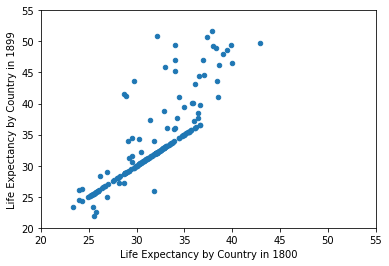

In [43]:
# Import matplotlib.pyplot
# import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

-----------

### Thinking about the question at hand

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

- `'Life expectancy'` is the first column (index `0`) of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to 0.
- There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

#### Instructions

- Define a function called `check_null_or_valid()` that takes in one argument: `row_data`.
- Inside the function, convert `no_na` to a numeric data type using `pd.to_numeric()`.
- Write an assert statement to make sure the first column (index `0`) of the `g1800s` DataFrame is `'Life expectancy'`.
- Write an assert statement to test that all the values are valid for the `g1800s` DataFrame. Use the `check_null_or_valid()` function placed inside the `.apply()` method for this. Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the `.all()` method twice, and remember that you don't have to use `()` for functions placed inside `.apply()`.
- Write an assert statement to make sure that each country occurs only once in the data. Use the `.value_counts()` method on the `'Life expectancy'` column for this. Specifically, index `0` of `.value_counts()` will contain the most frequently occuring value. If this is equal to `1` for the `'Life expectancy'` column, then you can be certain that no country appears more than once in the data.

In [44]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

------------

## A Little explanation of df.apply()  >> not question

Question arises from what does `axis` argument means in the function of `df.apply()`. Let's see an example.

In [45]:
# create a simple dataframe to understand
example = {'A': [2,2,2],
           'B': [3,3,3]}

example_df = pd.DataFrame(example)
example_df

,A,B
0,2,3
1,2,3
2,2,3


In [46]:
# let's use apply on column wise. It will give some of values for each colum
# by summing values column wise
example_df.apply(np.sum, axis=0)

A    6
B    9
dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> 

As you can see values are sum of values within each columns. Notice that in the output each row represents `A` and `B` column. Let's do rowwise sum.
</div>

In [47]:
example_df.apply(np.sum, axis=1)

0    5
1    5
2    5
dtype: int64

Now, that the calculation (summing) is performed row-wise.

**Continue with DataCamp questions below**

---------------

### Assembling your data

Here, three DataFrames have been pre-loaded: `g1800s`, `g1900s`, and `g2000s`. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called `gapminder`. This is a column-wise concatenation, similar to how you concatenated the Ebola dataset with information about patients in Chapter 3.

#### Instructions

- Use `pd.concat()` to concatenate `g1800s`, `g1900s`, and `g2000s` along the column axis into one DataFrame called `gapminder`. Make sure you pass DataFrames to `pd.concat()` in the form of a list.
- Print the shape and the head of the concatenated DataFrame.

In [48]:
# create g1900s and g2000s respectively
g1900s = gapminder.iloc[260:520, 100:200] # use iloc to get 1900s
g2000s = gapminder.iloc[520:, 200:] # use iloc to get 2000s

# insert the country names as a first column using insert method
g1900s.insert(0, "Life expectancy", country_names)

# drop Life expectancy column from g2000s to insert at index 0
g2000s.drop('Life expectancy', axis=1, inplace=True)
g2000s.insert(0, "Life expectancy", country_names)

In [49]:
# Concatenate the DataFrames column-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=1)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())

(260, 220)
         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  28.14  28.13  ...  52.4  52.8  53.3  53.6  54.0  54.4  54.8  54.9  53.8   
2    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...  76.6  76.8  77.0  77.2  77.4  77.5  77.7  77.9  78.0   
4  28.82  28.82  ...  75.3  75.5  75.7  76.0  76.1  76.2  76.3  76.3  76.4   

    2016  
0    NaN  
1  52.72  
2    NaN  
3  78.10  
4 

-----------

### Reshaping your data

Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

#### Instructions

- Reshape `gapminder` by melting it. Keep `'Life expectancy'` fixed by specifying it as an argument to the `id_vars` parameter.
- Rename the three columns of the melted DataFrame to `'country'`, `'year'`, and `'life_expectancy'` by passing them in as a list to `gapminder_melt.columns`.
- Print the head of the melted DataFrame.

In [50]:
# import gapminder data
gapminder = pd.read_csv("data/gapminder.csv", index_col=0)

In [51]:
# import pandas as pd

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


-----------

### Checking the data types

Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that `country` is of type `object`, `year` is of type `int64`, and `life_expectancy` is of type `float64`.

The tidy DataFrame has been pre-loaded as `gapminder`. Explore it in the IPython Shell using the `.info()` method. Notice that the column `'year'` is of type `object`. This is incorrect, so you'll need to use the `pd.to_numeric()` function to convert it to a numeric data type.

NumPy and pandas have been pre-imported as `np` and `pd`.

#### Instructions

- Convert the `year` column of `gapminder` using `pd.to_numeric()`.
- Assert that the `country` column is of type `np.object`. This has been done for you.
- Assert that the `year` column is of type `np.int64`.
- Assert that the `life_expectancy` column is of type `np.float64`.

In [52]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64

<div class="alert alert-block alert-info">
<b>Cool Trick:</b> 

In a cell if you do `Esc` then `F` on your keyboard while that cell is selected, you can perform **Find and Replace All**. 
</div>

----------

### Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the `'country'` column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

- The set of lower and upper case letters.
- Whitespace between words.
- Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - `str.contains()` - which takes a regular expression pattern, and applies it to the Series, returning `True` if there is a match, and `False` otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using `~`. This Boolean series can then be used to get the Series of countries that have invalid names.

#### Instructions

- Create a Series called `countries` consisting of the `'country'` column of `gapminder`.
- Drop all duplicates from `countries` using the `.drop_duplicates()` method.
- Write a regular expression that tests your assumptions of what characters belong in `countries`:
    - Anchor the pattern to match exactly what you want by placing a `^` in the beginning and `$` in the end.
    - Use `A-Za-z` to match the set of lower and upper case letters, `\.` to match periods, and `\s` to match whitespace between words.
- Use `str.contains()` to create a Boolean vector representing values that match the pattern.
- Invert the mask by placing a `~` before it.
- Subset the `countries` series using the `.loc[]` accessor and `mask_inverse`. Then hit 'Submit Answer' to see the invalid country names!

In [53]:
# Create the series of countries: countries
countries = gapminder_melt['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


------------

### More data cleaning and processing

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in --also known as [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics))--, or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See [pandas Foundations](https://www.datacamp.com/courses/pandas-foundations) for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have `NaN` in the `life_expectancy` column. Before doing so, it would be valuable to use assert statements to confirm that `year` and `country` do not have any missing values.

Begin by printing the shape of `gapminder` in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be *after dropping* the missing values!

#### Instructions

- Assert that `country` and `year` do not contain any missing values. The first assert statement has been written for you. Note the chaining of the `.all()` method to `pd.notnull()` to confirm that all values in the column are not null.
- Drop the rows in the data where any observation in `life_expectancy` is missing. As you confirmed that `country` and `year` don't have missing values, you can use the `.dropna()` method on the entire `gapminder` DataFrame, because any missing values would have to be in the `life_expectancy` column. The `.dropna()` method has the default keyword arguments `axis=0` and `how='any'`, which specify that rows with any missing values should be dropped.
- Print the shape of `gapminder`.

In [54]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder_melt = gapminder_melt.dropna()

# Print the shape of gapminder_melt
print(gapminder_melt.shape)

(43857, 3)


------------

### Wrapping up

Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the `life_expectancy` column. You should not get any values under 0 and you should see something reasonable on the higher end of the `life_expectancy` age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the `life_expectancy` column from each subset, and take an average of the values. You can achieve this using the [`.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method. This `.groupby()` method is covered in greater depth in [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas).

Finally, you can save your tidy and summarized DataFrame to a file using the `.to_csv()` method.

matplotlib.pyplot and pandas have been pre-imported as `plt` and `pd`. Go for it!

#### Instructions

- Create a histogram of the `life_expectancy` column using the `.plot()` method of `gapminder`. Specify `kind='hist'`.
- Group `gapminder` by `'year'` and aggregate `'life_expectancy'` by the mean. To do this:
    - Use the `.groupby()` method on `gapminder` with `'year'` as the argument. Then select `'life_expectancy'` and chain the `.mean()` method to it.
- Print the head and tail of `gapminder_agg`. This has been done for you.
- Create a line plot of average life expectancy per year by using the `.plot()` method (without any arguments in plot) on `gapminder_agg`.
- Save `gapminder` and `gapminder_agg` to csv files called `'gapminder.csv'` and `'gapminder_agg.csv'`, respectively, using the `.to_csv()` method.

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


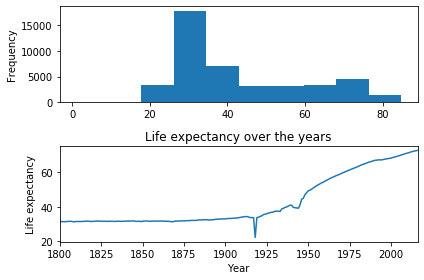

C:\Users\mmust\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [55]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('data/gapminder_saved.csv')
gapminder_agg.to_csv('data/gapminder_agg_saved.csv')

-------------

----------

# Practice Arena

In [56]:
recipe = 'I need 10 strawberries and 2 apples'
print(re.findall("\d+ [a-z]+", recipe))

['10 strawberries', '2 apples']


**[Corey Schafer - Python Tutorial: re Module - How to Write and Match Regular Expressions (Regex)](https://www.youtube.com/watch?v=K8L6KVGG-7o&t=255s)**

In [57]:
# create a text to use for regular expressions.
text_to_search = '''
abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890
Ha HaHa
MetaCharacters (Need to be escaped):
. ^ $ * + ? { } [ ] \ | ( )
coreyms.com
321-555-4321
123.555.1234
123*555*1234
800-555-1234
900-555-1234
Mr. Schafer
Mr Smith
Ms Davis
Mrs. Robinson
Mr. T
'''

In [58]:
# to create a pattern use re.compile
pattern = re.compile(r'abc')

matches = pattern.finditer(text_to_search)

for match in matches:
    print(match)

<re.Match object; span=(1, 4), match='abc'>


That span is actual index of the matched location of our pattern. We can see how it works. As you can see it gives us the location of our pattern matched with the given text.

In [59]:
text_to_search[1:4]

'abc'

Example for anchors `\b`, `\B`, `^`, `$`.

In [60]:
sentence = 'Start a sentence and then bring it to an end'

pattern = re.compile(r'^Start')

matches = pattern.finditer(sentence)

for match in matches:
    print(match)

<re.Match object; span=(0, 5), match='Start'>


In [61]:
# since a is not at the beginning this will give NO match
pattern = re.compile(r'^a')

matches = pattern.finditer(sentence)

for match in matches:
    print(match)

In [62]:
pattern = re.compile(r'end$')

matches = pattern.finditer(sentence)

for match in matches:
    print(match)

<re.Match object; span=(41, 44), match='end'>


Let's match the phone numbers from our original `text_to_search` string. We know that US phone number pattern is xxx-xxx-xxxx. All digits with dashes.

In [63]:
pattern = re.compile(r'\d{3}.\d{3}.\d{4}') # . catches any character dash, asterisk etc.

matches = pattern.finditer(text_to_search)

for match in matches:
    print(match)

<re.Match object; span=(151, 163), match='321-555-4321'>
<re.Match object; span=(164, 176), match='123.555.1234'>
<re.Match object; span=(177, 189), match='123*555*1234'>
<re.Match object; span=(190, 202), match='800-555-1234'>
<re.Match object; span=(203, 215), match='900-555-1234'>


Also let's see the usage of character sets. For example, if we want to catch only `800` and `900` phone numbers.

In [64]:
phones = """321-555-4321
            123.555.1234
            123*555*1234
            800-555-1234
            900-555-1234"""

In [65]:
pattern = re.compile(r'[89]00.\d{3}.\d{4}') # . catches any character dash, asterisk etc.

matches = pattern.finditer(text_to_search)

for match in matches:
    print(match)

<re.Match object; span=(190, 202), match='800-555-1234'>
<re.Match object; span=(203, 215), match='900-555-1234'>


As you can see, we put character set of `8` and `9` using `[89]`.